## Digit Recognition 

In [14]:
#import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
# import warnings filter
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

In [15]:
traindf = pd.read_csv('train.csv')     
testdf = pd.read_csv('test.csv')
#traindf.head()

Here the values represent the pixels of the digits.

In [16]:
testdf.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [17]:
train_data = pd.read_csv('train.csv').as_matrix()     #converting the data frame as matrix
test_data = pd.read_csv('test.csv').as_matrix()      #converting the data frame as matrix

## Prediction

In [38]:
clf = DecisionTreeClassifier()

#Training the data set
training_set = train_data[0:,1:]     #It takes all the rows from index 0 to end except 1st column
training_label = train_data[0:,0]    #It takes all the rows from index 0 and 1st column as it is the label

clf.fit(training_set, training_label)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [51]:
#Testing the data set
testing_set = test_data[0:,0:]       #It takes all the rows from index 0 to end

#Here there is no label, we have to predict the label hence all columns are considered

### Predicting one value to check if this model works 

[2]


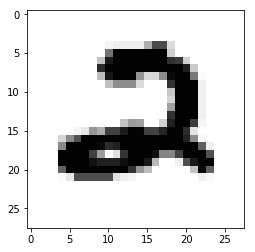

In [52]:
check_data = testing_set[0]
check_data.shape = (28,28)                    #The pixels rate is 28x28
plt.imshow(255-check_data, cmap='gray')    #255-check_data would display the graph in white bg
print(clf.predict( [testing_set[0]] ))
plt.show()

In [53]:
prediction = clf.predict(testing_set)
prediction                              # Values will be displayed in arrays

array([2, 0, 9, ..., 3, 9, 2], dtype=int64)

In [54]:
prediction = pd.DataFrame({'Label':prediction})  #Convert array to dataframe
prediction.head()

,Label
0,2
1,0
2,9
3,7
4,9


In [55]:
prediction.to_csv('Submission.csv')       #save as csv